# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of major incidents. The safety team classes major incidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these major incidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most major incidents happen?
2. Are there any patterns in the time of day/ day of the week when major incidents occur?
3. What characteristics stand out in major incidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce major incidents?

In [341]:
# Data Manipulation
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Configurations
sns.set_style('darkgrid')

# Utilities
import matplotlib.dates as md


In [342]:
df_accidents = pd.read_csv(r'./data/accident-data.csv', parse_dates=[['date', 'time']])
df_accidents.head()

,date_time,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
0,2020-04-02 09:00:00,2020010219808,2020,10219808,-0.254001,51.462262,3,1,1,3,...,6,0,9,9,1,9,9,0,0,1
1,2020-04-27 13:55:00,2020010220496,2020,10220496,-0.139253,51.470327,3,1,2,2,...,6,0,0,4,1,1,1,0,0,1
2,2020-01-01 01:25:00,2020010228005,2020,10228005,-0.178719,51.529614,3,1,1,4,...,6,0,0,0,4,1,2,0,0,1
3,2020-01-01 01:50:00,2020010228006,2020,10228006,-0.001683,51.541210,2,1,1,4,...,6,0,0,4,4,1,1,0,0,1
4,2020-01-01 02:25:00,2020010228011,2020,10228011,-0.137592,51.515704,3,1,2,4,...,5,0,0,0,4,1,1,0,0,1


# Verifying Datatypes and missing values

In [343]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date_time                                91199 non-null  datetime64[ns]
 1   accident_index                           91199 non-null  object        
 2   accident_year                            91199 non-null  int64         
 3   accident_reference                       91199 non-null  object        
 4   longitude                                91185 non-null  float64       
 5   latitude                                 91185 non-null  float64       
 6   accident_severity                        91199 non-null  int64         
 7   number_of_vehicles                       91199 non-null  int64         
 8   number_of_casualties                     91199 non-null  int64         
 9   day_of_week                            

In [311]:
# Change 'date' type (object) to datetime64[ns]
# change 'time' type (object) to timedelta
#df_accidents['date'] = df_accidents['date'].astype('datetime64[ns]')
#df_accidents['time'] = df_accidents['time'].astype('datetime64[ns]')
#df_accidents['time'] = pd.to_timedelta( df_accidents['time'] + ':00' )

In [344]:
df_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date_time                                91199 non-null  datetime64[ns]
 1   accident_index                           91199 non-null  object        
 2   accident_year                            91199 non-null  int64         
 3   accident_reference                       91199 non-null  object        
 4   longitude                                91185 non-null  float64       
 5   latitude                                 91185 non-null  float64       
 6   accident_severity                        91199 non-null  int64         
 7   number_of_vehicles                       91199 non-null  int64         
 8   number_of_casualties                     91199 non-null  int64         
 9   day_of_week                            

In [345]:
# df_accidents['accident_reference'].astype(int)
df_accidents[ df_accidents['accident_reference'].isin(['01T246170']) ]

,date_time,accident_index,accident_year,accident_reference,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
20905,2020-04-24 17:45:00,202001T246170,2020,01T246170,-0.07885,51.520359,3,2,2,6,...,5,0,9,9,1,9,9,9,9,1


# Thoughts

So far,there is no NA data in the dataset. In addition, we converted two columns to their correct data type. Accident_index and Accident_reference are not numeric because there are alphabet characters in the string. Another thing to note, the day_of_week starts with Sunday as 0 and Saturday as 6. I'll need to change this to fit with pandas dt.dayofweek.

In [346]:
df_accidents['day_of_week'] = df_accidents['date_time'].dt.dayofweek
df_accidents['day_name'] = df_accidents['date_time'].dt.day_name()

df_accidents['month_number'] = df_accidents['date_time'].dt.month
df_accidents['month_name'] = df_accidents['date_time'].dt.month_name() 


# Next Steps

Initially, I want to analysis the day and time the accidents are occuring. From there, we can build up to what type of accidents are occuring on those dates. 

In [348]:
df_accidents_timestamp = df_accidents[ ['accident_year','date_time','day_name','month_name','month_number','day_of_week'] ]

df_accidents_timestamp


,accident_year,date_time,day_name,month_name,month_number,day_of_week
0,2020,2020-04-02 09:00:00,Thursday,April,4,3
1,2020,2020-04-27 13:55:00,Monday,April,4,0
2,2020,2020-01-01 01:25:00,Wednesday,January,1,2
3,2020,2020-01-01 01:50:00,Wednesday,January,1,2
4,2020,2020-01-01 02:25:00,Wednesday,January,1,2
...,...,...,...,...,...,...
91194,2020,2020-12-08 14:30:00,Tuesday,December,12,1
91195,2020,2020-11-13 15:05:00,Friday,November,11,4
91196,2020,2020-04-15 12:42:00,Wednesday,April,4,2
91197,2020,2020-12-15 14:00:00,Tuesday,December,12,1


In [349]:
df_accidents_timestamp['accident_year'].unique()

array([2020])

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

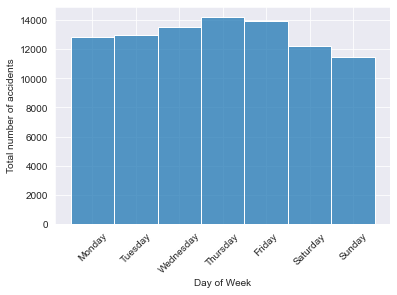

In [350]:
# Create histogram for day of week

sns.histplot(x = 'day_name', data = df_accidents_timestamp.sort_values(by='day_of_week'))

plt.ylabel('Total number of accidents')
plt.xlabel('Day of Week')

plt.xticks( rotation = 45 )


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

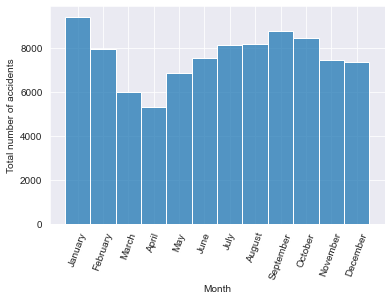

In [351]:
# Create histogram for day of week
sns.histplot(x = 'month_name', data = df_accidents_timestamp.sort_values(by='month_number') )

plt.ylabel('Total number of accidents')
plt.xlabel('Month')

plt.xticks( rotation = 70 )


# Thoughts

From the graphs above, we can see that majority of the accidents in the year 2020 occured on Thursday, followed by Friday and Wednesday. The level of severity could range from 0 to 3, which I'll look into later. In addition, a large quantity of accidents occured on January 2020, followed by September 2020 and October 2020. Interestingly, the number of accidents decreased from January 2020 to April 2020. This could be the cause of travel restrictions due to Covid-19.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

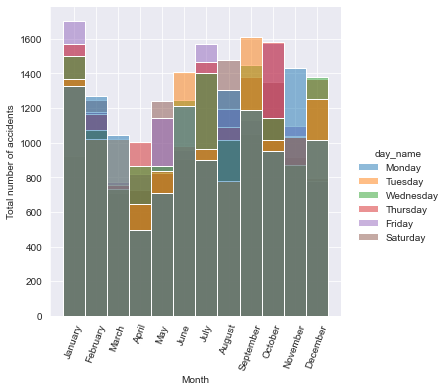

In [352]:
month_list = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']

sns.displot(x = 'month_name', 
            data = df_accidents_timestamp.sort_values(by='month_number'),
            kind = 'hist',
            hue ='day_name' , 
            hue_order= month_list,
             )

plt.ylabel('Total number of accidents')
plt.xlabel('Month')

plt.xticks( rotation = 70 )

# Thoughts
A histogram is not a good way to see the differences in total number of accidents in the days per month. I'll try a line graph.

In [353]:
df_temp = df_accidents_timestamp[ ['day_name','month_name','month_number','day_of_week'] ].value_counts().reset_index().sort_values(by=['day_of_week','month_number'])
df_temp = df_temp.rename(columns = {0:'count'})

df_temp

,day_name,month_name,month_number,day_of_week,count
18,Monday,January,1,0,1329
21,Monday,February,2,0,1268
40,Monday,March,3,0,1042
83,Monday,April,4,0,498
81,Monday,May,5,0,711
...,...,...,...,...,...
20,Sunday,August,8,6,1303
55,Sunday,September,9,6,952
69,Sunday,October,10,6,815
39,Sunday,November,11,6,1047


In [355]:
df_temp['cumSum'] = df_temp[['day_of_week','count']].groupby(['day_of_week']).cumsum()

df_temp.head(13)

,day_name,month_name,month_number,day_of_week,count,cumSum
18,Monday,January,1,0,1329,1329
21,Monday,February,2,0,1268,2597
40,Monday,March,3,0,1042,3639
83,Monday,April,4,0,498,4137
81,Monday,May,5,0,711,4848
27,Monday,June,6,0,1214,6062
62,Monday,July,7,0,901,6963
19,Monday,August,8,0,1304,8267
29,Monday,September,9,0,1188,9455
54,Monday,October,10,0,953,10408


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

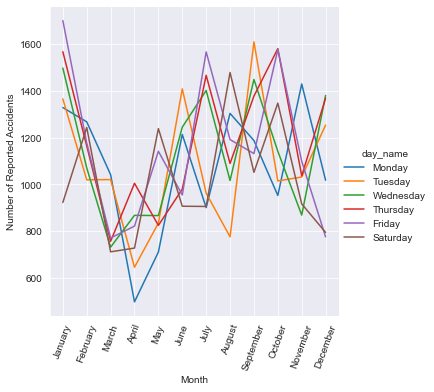

In [356]:
sns.relplot(x = 'month_name' , y = 'count', data = df_temp.sort_values(by='month_number'), kind='line' , hue = 'day_name',hue_order=month_list)

plt.xlabel('Month')
plt.ylabel('Number of Reported Accidents')

plt.xticks( rotation = 70 )


# Thoughts

The graph shows that there was a drop in accidents from January 2020 to April 2020, with no regards to the days in which the accidents happened. However, the graph is too messy to see if there's any interesting facts about the days the accidents are occuring.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

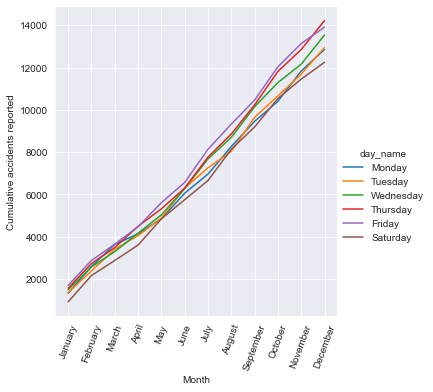

In [357]:
sns.relplot(x = 'month_name' , y = 'cumSum', data = df_temp.sort_values(by='month_number'), kind='line' , hue = 'day_name',hue_order=month_list)

plt.xlabel('Month')
plt.ylabel('Cumulative accidents reported')
plt.xticks( rotation = 70 )

# Thoughts

From the graph above, we see that majority of the accidents were occuring on a Friday from January 2020 to November 2020, followed closely by Thursday. The accumulation of accidents on each day for each month was constantly increasing. This means that the number of accidents occuring each month is about the same. 

In [376]:
df_timeReport = df_accidents['date_time'].dt.strftime("%H:%M").value_counts().reset_index()
df_timeReport_V2 = df_timeReport.rename(columns={'date_time':'count','index':'time'})
df_timeReport_V2['time'] = df_timeReport_V2['time'].astype('datetime64[ns]')

df_timeReport_V2

,time,count
0,2021-12-08 17:00:00,862
1,2021-12-08 16:00:00,785
2,2021-12-08 15:00:00,774
3,2021-12-08 17:30:00,746
4,2021-12-08 18:00:00,739
...,...,...
1433,2021-12-08 03:36:00,1
1434,2021-12-08 04:58:00,1
1435,2021-12-08 04:39:00,1
1436,2021-12-08 04:33:00,1


Text(0, 0.5, 'Total number of accidents in 2020')

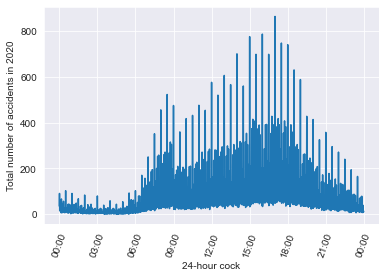

In [377]:
ax1 = sns.lineplot(x='time',y='count', data = df_timeReport_V2)

ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.xticks( rotation = 70 )

plt.xlabel('24-hour cock')
plt.ylabel('Total number of accidents in 2020')

# Thoughts
From the graph above, there are two peaks for the number of accidents in the day, between 8:00 - 9:00 and 15:00 - 18:00. There appears to be columns in the graph, and can be explained by the rounding of time to the 30min mark. We can do the same thing to the other times to get a better picture of when accidents are occuring within a 30min interval.

In [389]:
df_time_reported_15min = df_accidents['date_time'].dt.round('15T').dt.strftime("%H:%M").value_counts().reset_index()

df_time_reported_15min_V2 = df_time_reported_15min.rename(columns={'date_time':'count','index':'time'})
df_time_reported_15min_V2['time'] = df_time_reported_15min_V2['time'].astype('datetime64[ns]')

df_time_reported_15min_V2


,time,count
0,2021-12-08 17:00:00,2070
1,2021-12-08 17:30:00,1995
2,2021-12-08 17:15:00,1964
3,2021-12-08 15:15:00,1900
4,2021-12-08 15:30:00,1861
...,...,...
91,2021-12-08 04:15:00,129
92,2021-12-08 04:30:00,128
93,2021-12-08 03:30:00,128
94,2021-12-08 03:45:00,126


Text(0, 0.5, 'Total number of accidents in 2020')

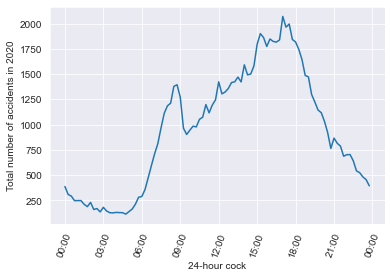

In [390]:
ax1 = sns.lineplot(x='time',y='count', data = df_time_reported_15min_V2)

ax1.xaxis.set_major_formatter(md.DateFormatter('%H:%M'))
plt.xticks( rotation = 70 )

plt.xlabel('24-hour cock')
plt.ylabel('Total number of accidents in 2020')

# Thoughts

In the graph above, the time of the accidents have been binned to a 15 min interval. Just like the previous graph, there is an increase in the number of accidents starting at 6:00 and peaks at 18:00. There is decrease in accidents between 18:00 to 00:00 and 00:00 to 6:00. 